# DACON - 쇼핑몰 지점별 매출액 예측 경진대회
## EDA and Preprocessing
### Data
[DACON - 쇼핑몰 지점별 매출액 예측 경진대회](https://dacon.io/competitions/official/235942/data)

### 사용 라이브러리

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import koreanize_matplotlib
import glob

### Data Load

In [2]:
train, test = pd.read_csv("data/train.csv"), pd.read_csv("data/test.csv")

train.shape, test.shape

((6255, 13), (180, 12))

In [3]:
display(train.head(3))
display(test.head(3))

,id,Store,Date,Temperature,Fuel_Price,Promotion1,Promotion2,Promotion3,Promotion4,Promotion5,Unemployment,IsHoliday,Weekly_Sales
0,1,1,05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,8.106,False,1643690.90
1,2,1,12/02/2010,38.51,2.548,NaN,NaN,NaN,NaN,NaN,8.106,True,1641957.44
2,3,1,19/02/2010,39.93,2.514,NaN,NaN,NaN,NaN,NaN,8.106,False,1611968.17


,id,Store,Date,Temperature,Fuel_Price,Promotion1,Promotion2,Promotion3,Promotion4,Promotion5,Unemployment,IsHoliday
0,1,1,05/10/2012,68.55,3.617,8077.89,NaN,18.22,3617.43,3626.14,6.573,False
1,2,1,12/10/2012,62.99,3.601,2086.18,NaN,8.11,602.36,5926.45,6.573,False
2,3,1,19/10/2012,67.97,3.594,950.33,NaN,4.93,80.25,2312.85,6.573,False


### EDA and Preprocessing
#### 기본 정보 확인

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6255 entries, 0 to 6254
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            6255 non-null   int64  
 1   Store         6255 non-null   int64  
 2   Date          6255 non-null   object 
 3   Temperature   6255 non-null   float64
 4   Fuel_Price    6255 non-null   float64
 5   Promotion1    2102 non-null   float64
 6   Promotion2    1592 non-null   float64
 7   Promotion3    1885 non-null   float64
 8   Promotion4    1819 non-null   float64
 9   Promotion5    2115 non-null   float64
 10  Unemployment  6255 non-null   float64
 11  IsHoliday     6255 non-null   bool   
 12  Weekly_Sales  6255 non-null   float64
dtypes: bool(1), float64(9), int64(2), object(1)
memory usage: 592.6+ KB


In [5]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            180 non-null    int64  
 1   Store         180 non-null    int64  
 2   Date          180 non-null    object 
 3   Temperature   180 non-null    float64
 4   Fuel_Price    180 non-null    float64
 5   Promotion1    178 non-null    float64
 6   Promotion2    45 non-null     float64
 7   Promotion3    161 non-null    float64
 8   Promotion4    146 non-null    float64
 9   Promotion5    180 non-null    float64
 10  Unemployment  180 non-null    float64
 11  IsHoliday     180 non-null    bool   
dtypes: bool(1), float64(8), int64(2), object(1)
memory usage: 15.8+ KB


`Promotion`부분에 결측치가 존재하는걸 확인할 수 있음

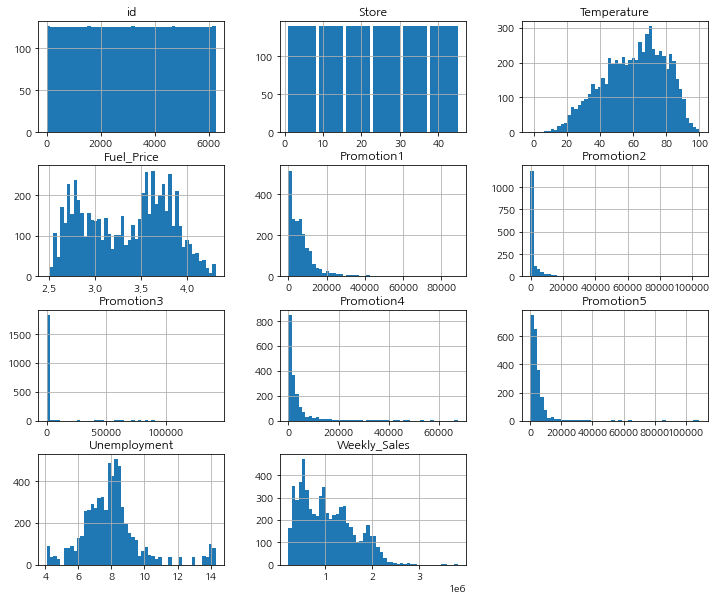

In [6]:
_ = train.hist(bins=50, figsize=(12, 10))

- id : 샘플 아이디
- Store : 쇼핑몰 지점
- Date : 주 단위(Weekly) 날짜
- Temperature : 해당 쇼핑몰 주변 기온
- Fuel_Price : 해당 쇼핑몰 주변 연료 가격
- Promotion 1~5 : 해당 쇼핑몰의 비식별화된 프로모션 정보
- Unemployment : 해당 쇼핑몰 지역의 실업률
- IsHoliday : 해당 기간의 공휴일 포함 여부
- Weekly_Sales : 주간 매출액 (목표 예측값)

#### Store: 쇼핑몰 지점

In [7]:
train["Store"].isnull().sum(), test["Store"].isnull().sum()

(0, 0)

In [8]:
set(train["Store"].unique()) == set(test["Store"].unique())

True

쇼핑몰 지점은 `train`과 `test`가 같다라는 점을 확일할 수 있음

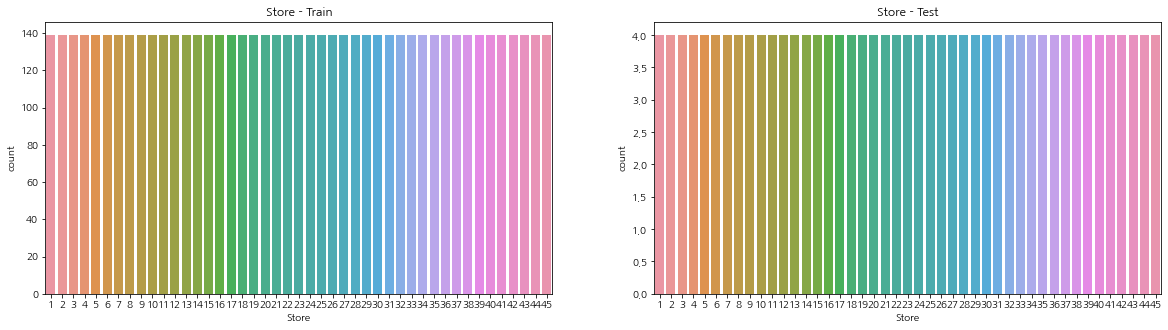

In [9]:
fig, ax = plt.subplots(1, 2, figsize=(20, 5))
sns.countplot(x=train["Store"], ax=ax[0]).set_title("Store - Train")
sns.countplot(x=test["Store"], ax=ax[1]).set_title("Store - Test")
plt.show()

#### Date: 주 단위 날짜
일/월/년 형식의 `object` 타입

In [10]:
train["Date"] = pd.to_datetime(train["Date"], format="%d/%m/%Y")
test["Date"] = pd.to_datetime(test["Date"], format="%d/%m/%Y")

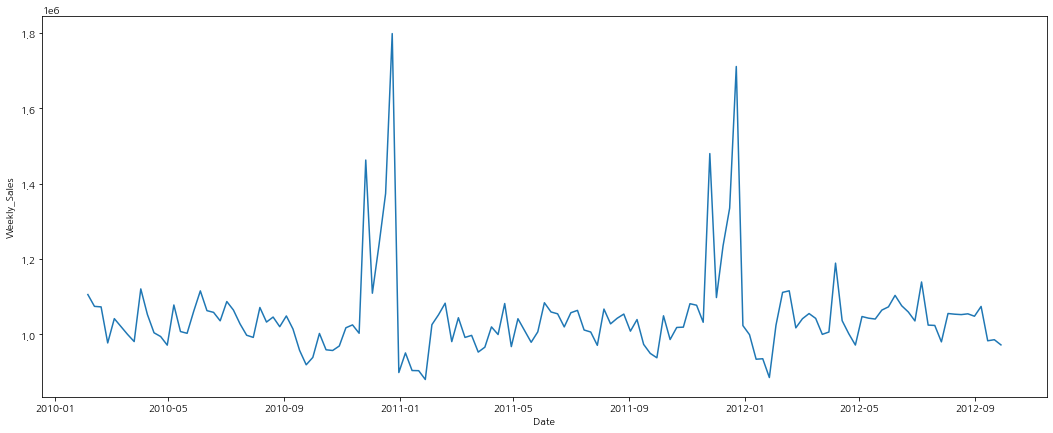

In [11]:
plt.figure(figsize=(18, 7))
sns.lineplot(data=train, x="Date", y="Weekly_Sales", ci=None)
plt.show()

특정 기간에 매출이 급격히 오르고/내려가는 경우가 있다는 것을 확인 가능함  
여러개의 매장이 합쳐져 있는 값이므로 극단값의 영향이 클꺼라는 생각이 듬

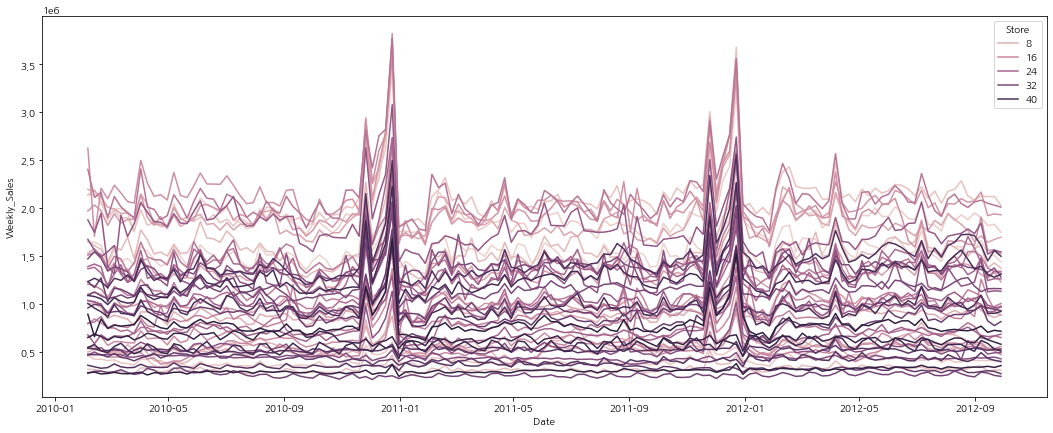

In [12]:
plt.figure(figsize=(18, 7))
sns.lineplot(data=train, x="Date", y="Weekly_Sales", ci=None, hue="Store")
plt.show()

`Store`별로 나누어 찍었을때 보면, 특정 매장의 매출이 급격하게 변하는 시점이 있다는 것을 확인함

In [13]:
train["Year"] = train["Date"].dt.year
test["Year"] = test["Date"].dt.year

train["Month"] = train["Date"].dt.month
test["Month"] = test["Date"].dt.month

train["Day"] = train["Date"].dt.day
test["Day"] = test["Date"].dt.day

In [14]:
train

,id,Store,Date,Temperature,Fuel_Price,Promotion1,Promotion2,Promotion3,Promotion4,Promotion5,Unemployment,IsHoliday,Weekly_Sales,Year,Month,Day
0,1,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,8.106,False,1643690.90,2010,2,5
1,2,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,8.106,True,1641957.44,2010,2,12
2,3,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,8.106,False,1611968.17,2010,2,19
3,4,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,8.106,False,1409727.59,2010,2,26
4,5,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,8.106,False,1554806.68,2010,3,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6250,6251,45,2012-08-31,75.09,3.867,23641.30,6.00,92.93,6988.31,3992.13,8.684,False,734297.87,2012,8,31
6251,6252,45,2012-09-07,75.70,3.911,11024.45,12.80,52.63,1854.77,2055.70,8.684,True,766512.66,2012,9,7
6252,6253,45,2012-09-14,67.87,3.948,11407.95,NaN,4.30,3421.72,5268.92,8.684,False,702238.27,2012,9,14
6253,6254,45,2012-09-21,65.32,4.038,8452.20,92.28,63.24,2376.38,8670.40,8.684,False,723086.20,2012,9,21


#### Temperature: 해당 쇼핑몰 주변 기온

In [15]:
train["Temperature"].isnull().sum(), test["Temperature"].isnull().sum()

(0, 0)

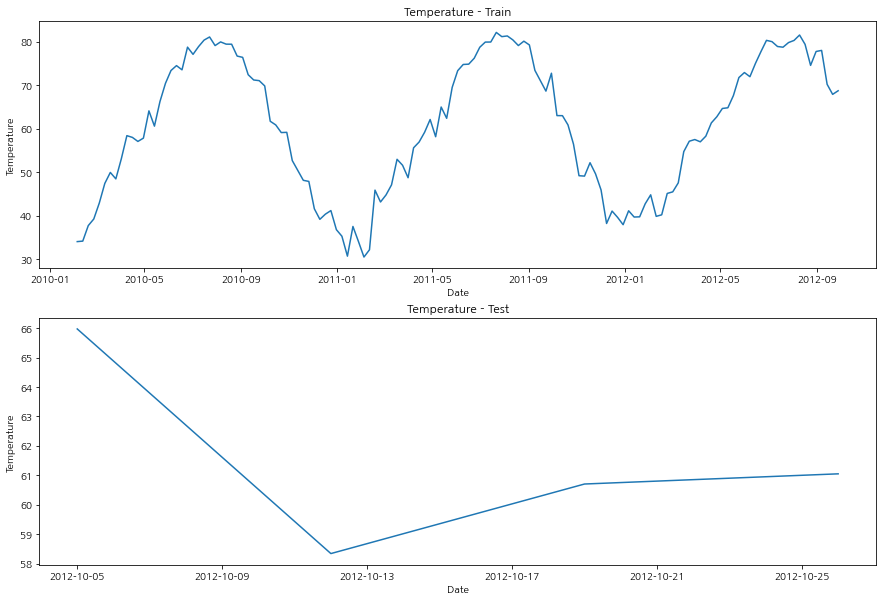

In [16]:
fig, ax = plt.subplots(2, 1, figsize=(15, 10))
sns.lineplot(data=train, x="Date", y="Temperature", ci=None, ax=ax[0]).set_title("Temperature - Train")
sns.lineplot(data=test, x="Date", y="Temperature", ci=None, ax=ax[1]).set_title("Temperature - Test")
plt.show()

`train`은 12년 10월 이전의 데이터고, `test`는 12년 10월 이후의 데이터이므로 기온의 추이가 다른것을 볼 수 있음  
기온의 값이 생각보다 높아서, 화씨가 아닐까라는 생각을 함

In [17]:
train["Cel"] = train["Temperature"].apply(lambda x: round((x-32)*5/9, 1))
test["Cel"] = test["Temperature"].apply(lambda x: round((x-32)*5/9, 1))

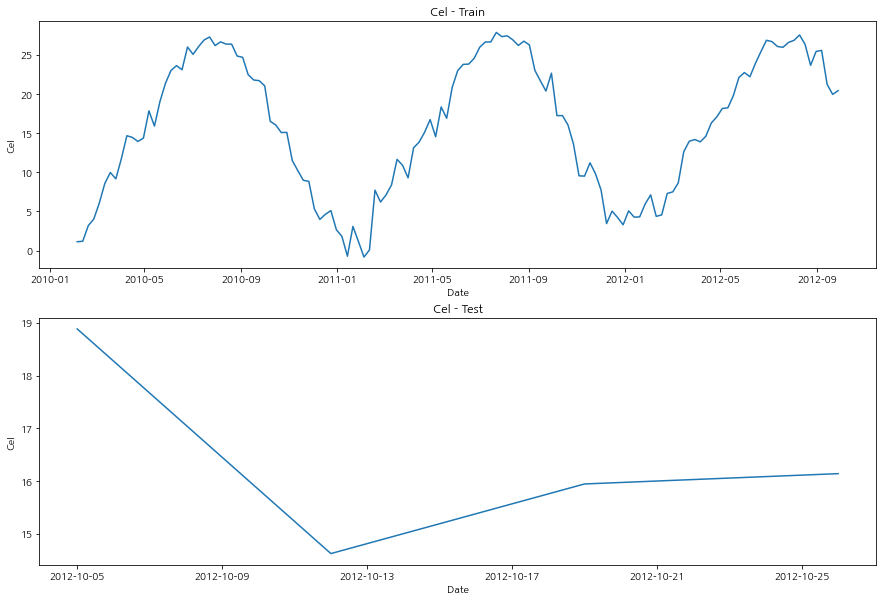

In [18]:
fig, ax = plt.subplots(2, 1, figsize=(15, 10))
sns.lineplot(data=train, x="Date", y="Cel", ci=None, ax=ax[0]).set_title("Cel - Train")
sns.lineplot(data=test, x="Date", y="Cel", ci=None, ax=ax[1]).set_title("Cel - Test")
plt.show()

기존 데이터로 주어진 온도는 화씨로 주어진 데이터임

#### Fuel_Price: 해당 쇼핑몰 주변 연료 가격

In [19]:
train["Fuel_Price"].isnull().sum(), test["Fuel_Price"].isnull().sum()

(0, 0)

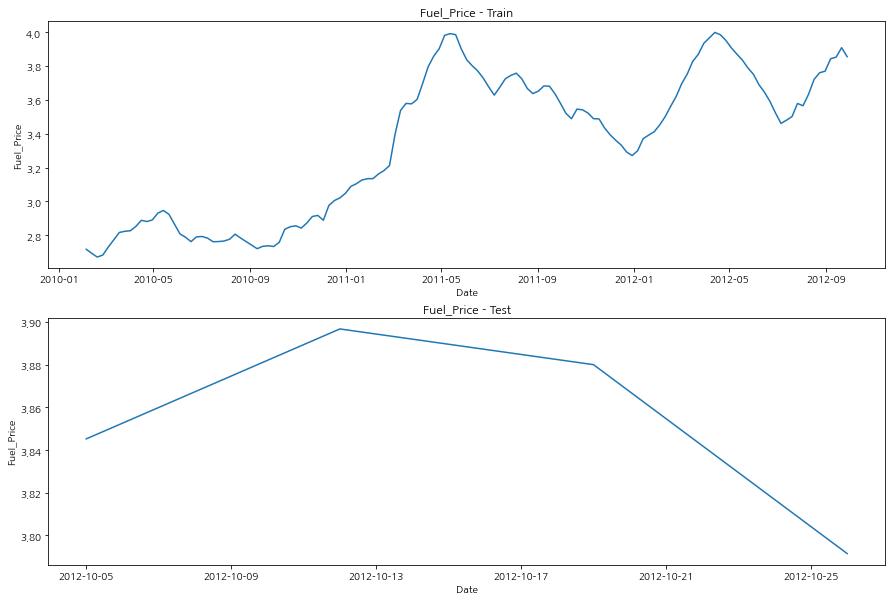

In [20]:
fig, ax = plt.subplots(2, 1, figsize=(15, 10))
sns.lineplot(data=train, x="Date", y="Fuel_Price", ci=None, ax=ax[0]).set_title("Fuel_Price - Train")
sns.lineplot(data=test, x="Date", y="Fuel_Price", ci=None, ax=ax[1]).set_title("Fuel_Price - Test")
plt.show()

#### Promotion

In [21]:
promotion = ["Promotion1", "Promotion2", "Promotion3", "Promotion4", "Promotion5"]
data = [train, test]

for pro in promotion:
    print(f"{pro}: {train[pro].isnull().sum()}")
print("---------")
for pro in promotion:
    print(f"{pro}: {test[pro].isnull().sum()}")

Promotion1: 4153
Promotion2: 4663
Promotion3: 4370
Promotion4: 4436
Promotion5: 4140
---------
Promotion1: 2
Promotion2: 135
Promotion3: 19
Promotion4: 34
Promotion5: 0


`Promotion`에는 결측치들이 존재함

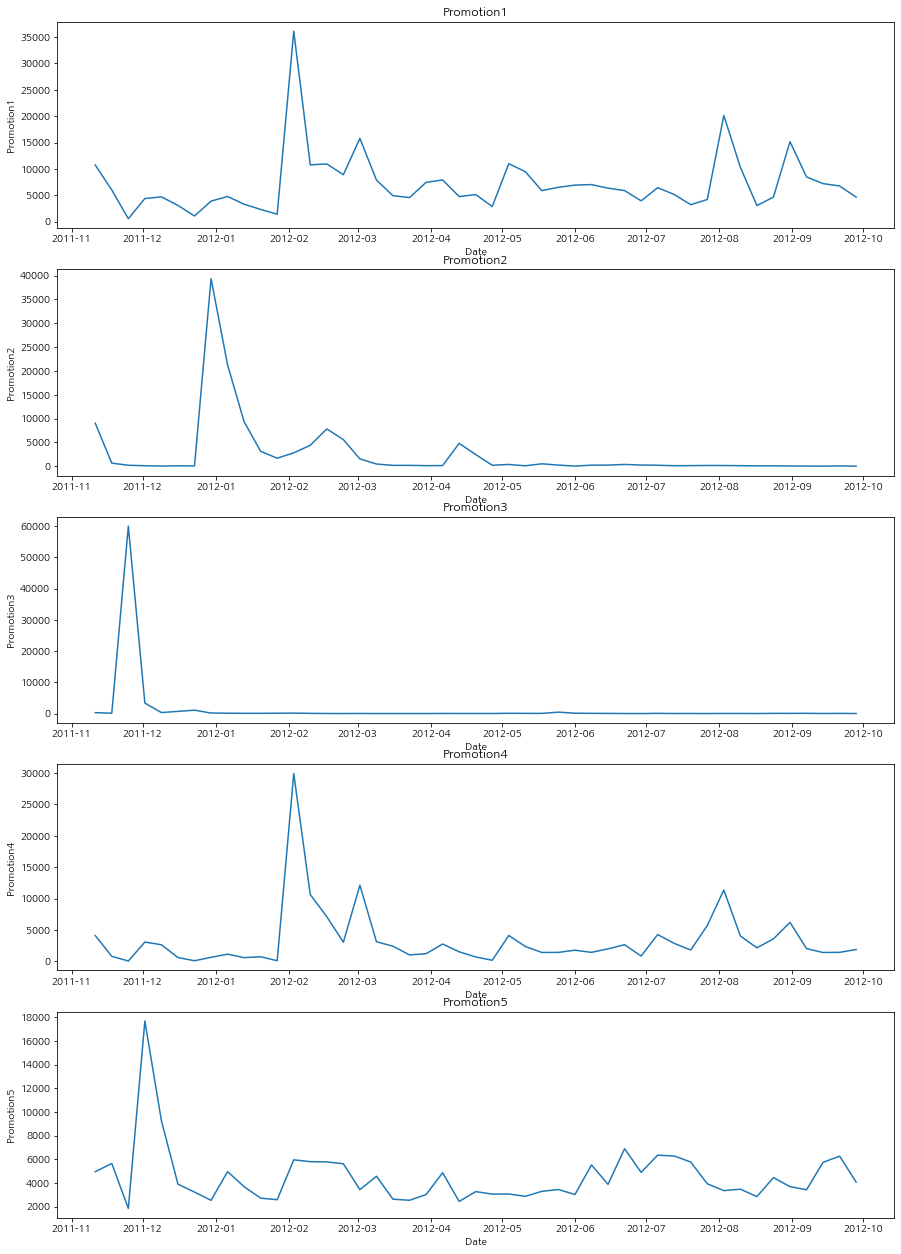

In [22]:
fig, ax = plt.subplots(len(promotion), 1, figsize=(15, 22))
for col, ax in zip(promotion, ax):
    sns.lineplot(data=train, x="Date", y=col, ci=None, ax=ax).set_title(f"{col}")
plt.show()

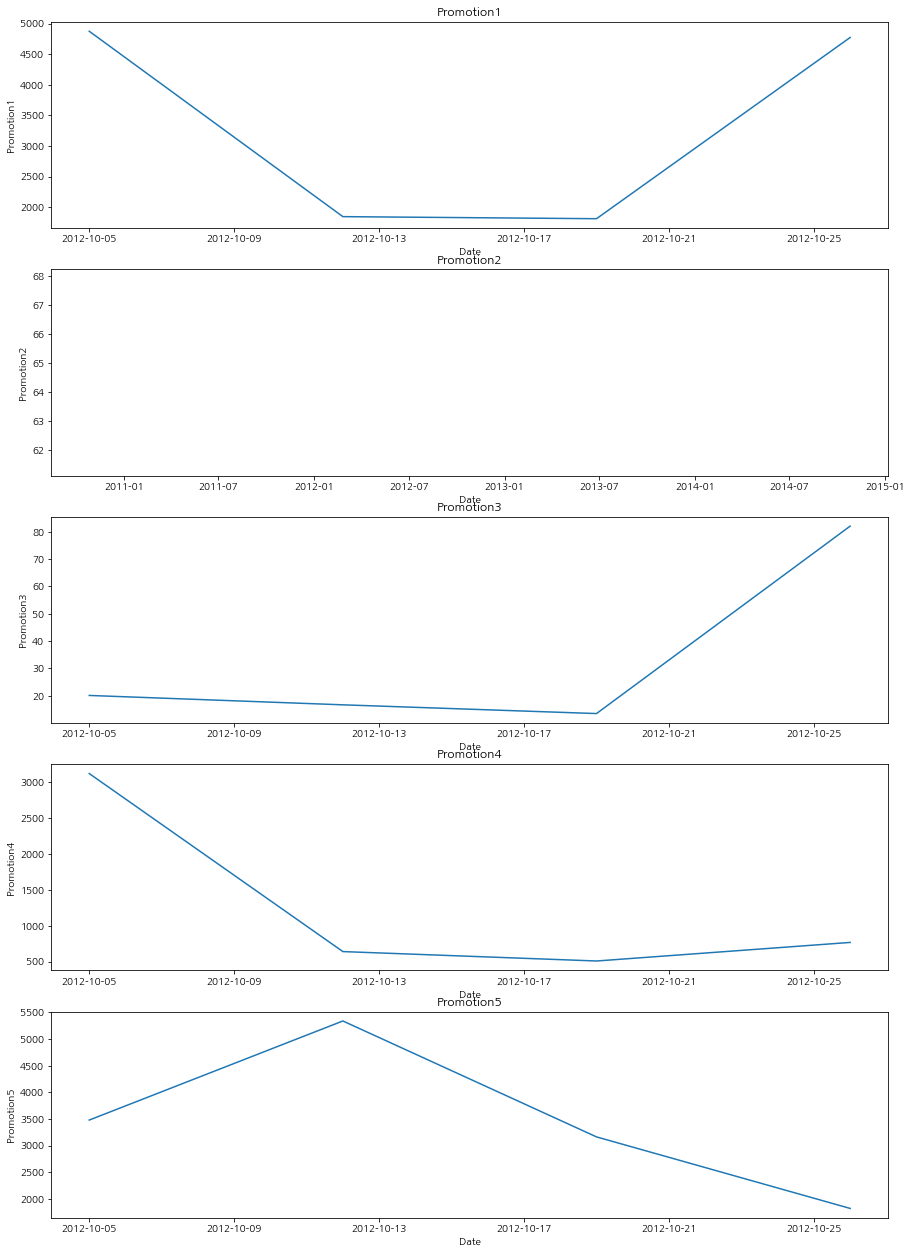

In [23]:
fig, ax = plt.subplots(len(promotion), 1, figsize=(15, 22))
for col, ax in zip(promotion, ax):
    sns.lineplot(data=test, x="Date", y=col, ci=None, ax=ax).set_title(f"{col}")
plt.show()

`Promotion`들은 2011년 11월 이후에 발생한 이벤트라고 생각할 수 있음 -> 2011년 11월 이전의 `Promotion`의 결측치는 0으로 처리하고, 해당하지 않는 데이터는 선형 보간법을 이용  
선형 보간을 위해 `train`과 `test`를 임시로 합치고 결측치 처리 후 다시 나눠줌

In [24]:
temp = pd.concat([train, test])
temp.shape

(6435, 17)

In [25]:
train.shape

(6255, 17)

In [26]:
def fill_promotion(cols):
    year, promotion = cols[0], cols[1]
    if pd.isnull(promotion):
        if year<2011: return 0
        else: return promotion
    else:
        return promotion

In [27]:
for p in promotion:
    temp[p] = temp[["Year", p]].apply(fill_promotion, axis=1)

In [28]:
# 선형 보간
temp[promotion] = temp[promotion].interpolate("linear", axis=1)

In [29]:
train = temp.iloc[:train.shape[0]]
test = temp.iloc[train.shape[0]:]

train.shape, test.shape

((6255, 17), (180, 17))

#### Unemployment: 해당 쇼핑몰 지역의 실업률

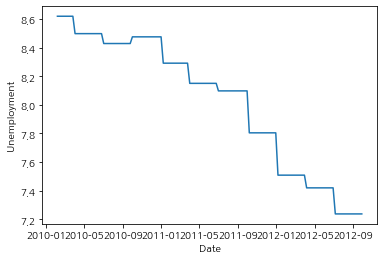

In [30]:
_ = sns.lineplot(data=train, x="Date", y="Unemployment", ci=None)

실업률은 감소하는 추세임

#### IsHoliday: 해당 기간의 공휴일 포함 여부

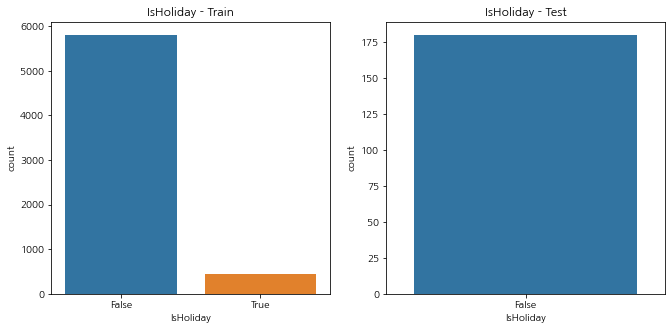

In [31]:
fig, ax = plt.subplots(1, 2, figsize=(11, 5))
sns.countplot(x=train["IsHoliday"], ax=ax[0]).set_title("IsHoliday - Train")
sns.countplot(x=test["IsHoliday"], ax=ax[1]).set_title("IsHoliday - Test")
plt.show()

해당 데이터는 원-핫 인코딩을 해주면 될꺼 같음

#### Weekly_Sales: 주간 매출액 (목표 예측값)

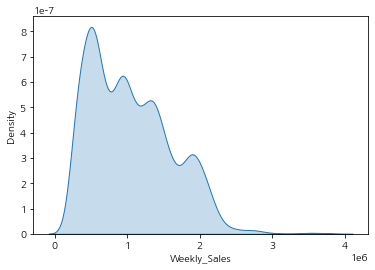

In [32]:
_ = sns.kdeplot(train["Weekly_Sales"], shade=True)

로그 스케일링을 적용함

C:\Users\spec3\AppData\Local\Temp\ipykernel_1936\23640199.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train["Weekly_Sales_log1p"] = np.log1p(train["Weekly_Sales"])


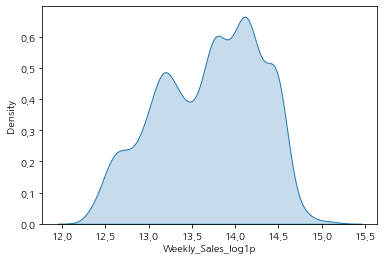

In [33]:
train["Weekly_Sales_log1p"] = np.log1p(train["Weekly_Sales"])
_ = sns.kdeplot(train["Weekly_Sales_log1p"], shade=True)

In [34]:
train.to_csv("data/pre_train.csv", index=False)
test.to_csv("data/pre_test.csv", index=False)